In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [3]:
df = pd.read_csv('stock_prices (2).csv')
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-02   74.059998   75.150002   73.797501   75.087502   73.785904   
1    2020-01-03   74.287498   75.144997   74.125000   74.357498   73.068573   
2    2020-01-06   73.447502   74.989998   73.187500   74.949997   73.650787   
3    2020-01-07   74.959999   75.224998   74.370003   74.597504   73.304413   
4    2020-01-08   74.290001   76.110001   74.290001   75.797501   74.483597   
..          ...         ...         ...         ...         ...         ...   
248  2020-12-24  131.320007  133.460007  131.100006  131.970001  130.802322   
249  2020-12-28  133.990005  137.339996  133.509995  136.690002  135.480591   
250  2020-12-29  138.050003  138.789993  134.339996  134.869995  133.676682   
251  2020-12-30  135.580002  135.990005  133.399994  133.720001  132.536850   
252  2020-12-31  134.080002  134.740005  131.720001  132.690002  131.515976   

        Volume  
0    135480400  
1    146322800  


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [28]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
#Listing different columns
high=df["High"].tolist()
low=df["Low"].tolist()
close=df["Close"].tolist()

In [30]:
#Defining lists for +DMs,-DMs, and TR values
pdm=[]
mdm=[]
tr=[]

In [31]:
#For loop to define +DM, -DM, and TR
for i in range(253):
  if(i==0):
    pdm.append(high[i]-0)
    mdm.append(0-low[i])
    tr.append(max(high[i]-low[i],high[i]-0))
  else:
    pdm.append(high[i]-high[i-1])
    mdm.append(low[i-1]-low[i])
    tr.append(max(high[i]-low[i],high[i]-close[i-1]))


In [32]:
#Defining Lists for Smoothed +DM, Smoothed -DM, and Smoothed TR
smpdm=[]
smmdm=[]
smtr=[]

In [33]:
#Defining lists to store +DI, -DI, DMI(DX)
pdi=[]
mdi=[]
dmi=[]

In [34]:
for i in range(14,253):
  sumpdm=0
  summdm=0
  sumtr=0
  for j in range(i-14,i):
    sumpdm+=pdm[j]
    summdm+=mdm[j]
    sumtr+=tr[j]
  #Defining smoothed +DMs, -DMs, and TR with corresponding formulae
  smpdm.append(sumpdm*(13/14)+pdm[i])
  smmdm.append(summdm*(13/14)+mdm[i])
  smtr.append(sumtr*(13/14)+tr[i])

In [35]:
for i in range(len(smtr)):
  #Defining +DI, -DI, DMI(DX) with corresponding formulae
  pdi.append(smpdm[i]/smtr[i])
  mdi.append(smmdm[i]/smtr[i])
  dmi.append((abs(pdi[i]-mdi[i])/abs(pdi[i]+mdi[i]))*100)

In [36]:
adx=[]# Defining ADX with corresponding formula
sum=0
for i in range(14):
  sum+=dmi[i]
adx.append(sum/14)

In [37]:
print(len(adx))

1


In [38]:
#Defining ADX with corresponding values
for i in range(15,len(dmi)):
  adx.append(((adx[i-15]*13)+dmi[i])/14)

In [39]:
for i in range(len(adx)):
  adx[i]*=100

In [40]:
print(adx.index(max(adx)))

131


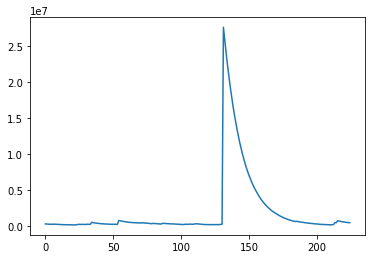

In [41]:
y=np.array(adx)#Plotting the ADX values
plt.plot(y)
plt.show()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

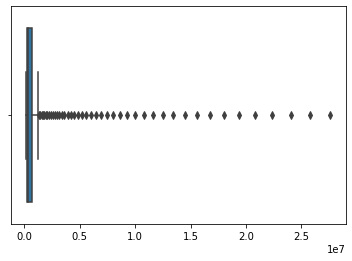

In [43]:
sns.boxplot(adx)
plt.show()

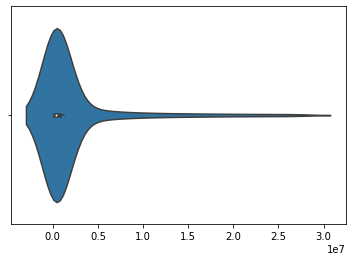

In [44]:
sns.violinplot(adx)
plt.show()

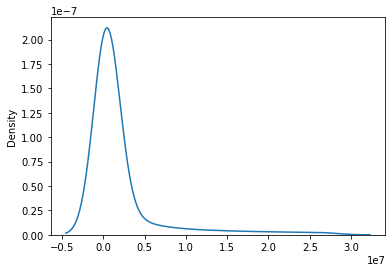

In [45]:
sns.distplot(adx,hist=False)
plt.show()

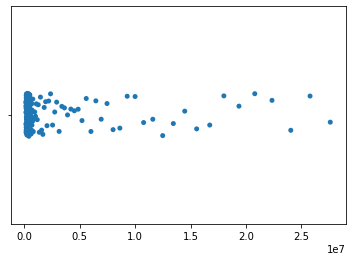

In [46]:
sns.stripplot(adx)
plt.show()

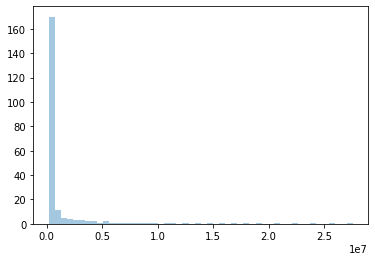

In [47]:
sns.distplot(adx,kde=False)
plt.show()